In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

QUESTION 1

In [2]:
data=pd.read_excel('C:/Users/lenovo/Downloads/taxdata.xlsx')
data.head()

,Code,Country,Statutory Corporate Tax Rate,1st Year Effective Tax Rate,5-Year Effective Tax Rate,Labor Tax,Other Taxes,VAT and Sales Tax,PIT top marginal rate,Number of tax payments
0,ARG,Argentina,35.00,23.53565,23.79745,19.50633,14.51464,24.0,35.0,34
1,ARM,Armenia,20.00,11.48304,12.45532,16.00250,0.53165,20.0,20.0,50
2,AUS,Australia,30.00,21.96434,23.03405,11.38362,0.23785,10.0,47.0,12
3,AUT,Austria,34.00,20.85810,21.04150,25.10836,0.18913,20.0,50.0,20
4,BEL,Belgium,33.99,16.70624,19.57142,24.26725,0.53845,21.0,50.0,10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Code                          85 non-null     object 
 1   Country                       85 non-null     object 
 2   Statutory Corporate Tax Rate  85 non-null     float64
 3   1st Year Effective Tax Rate   85 non-null     float64
 4   5-Year Effective Tax Rate     85 non-null     float64
 5   Labor Tax                     85 non-null     float64
 6   Other Taxes                   85 non-null     float64
 7   VAT and Sales Tax             85 non-null     float64
 8   PIT top marginal rate         85 non-null     float64
 9   Number of tax payments        85 non-null     int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 6.8+ KB


In [4]:
data.index

RangeIndex(start=0, stop=85, step=1)

In [5]:
data.columns

Index(['Code', 'Country', 'Statutory Corporate Tax Rate',
       '1st Year Effective Tax Rate', '5-Year Effective Tax Rate', 'Labor Tax',
       'Other Taxes', 'VAT and Sales Tax', 'PIT top marginal rate',
       'Number of tax payments'],
      dtype='object')

In [11]:
min_tax=data['Labor Tax'].min()
#print(min_tax)
avg_tax=data['Labor Tax'].mean()
#print(avg_tax)
max_tax=data['Labor Tax'].max()
print(max_tax)

37.64708


QUESTION 2

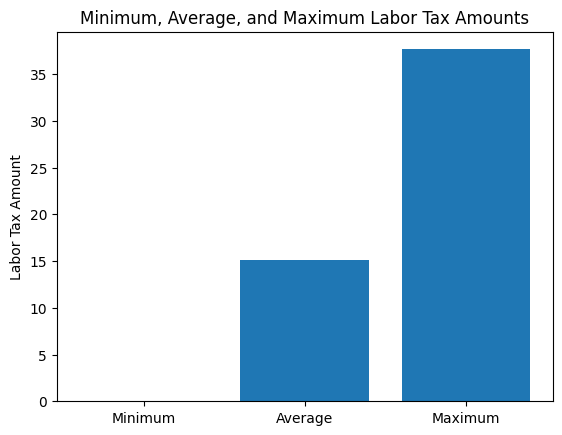

In [13]:
fig,ax = plt.subplots()
ax.bar(['Minimum', 'Average', 'Maximum'],[min_tax,avg_tax, max_tax])
ax.set_ylabel('Labor Tax Amount')
ax.set_title('Minimum, Average, and Maximum Labor Tax Amounts')
plt.show()

QUESTION 3

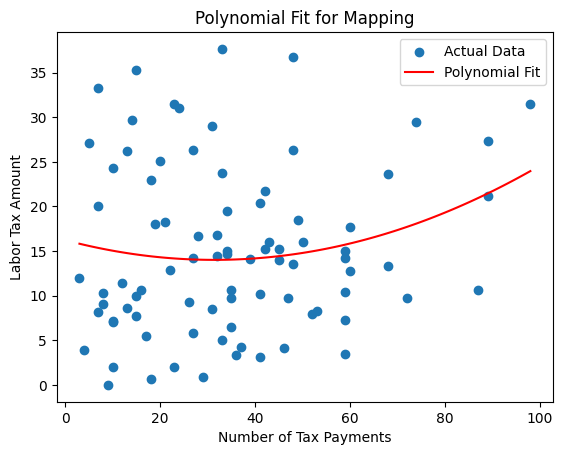

In [15]:
def fit_function(x, a, b, c):
    return a * x**2 + b * x + c

x_data = data['Number of tax payments']
y_data = data['Labor Tax']

popt, pcov = curve_fit(fit_function, x_data, y_data)

x_values = np.linspace(min(x_data), max(x_data), 100)
y_values = fit_function(x_values, *popt)

plt.scatter(x_data, y_data, label='Actual Data')
plt.plot(x_values, y_values, 'r', label='Polynomial Fit')
plt.xlabel('Number of Tax Payments')
plt.ylabel('Labor Tax Amount')
plt.title('Polynomial Fit for Mapping')
plt.legend()
plt.show()